# Path likelihood

In [54]:
using BSON: @save, @load
using Statistics
using DelimitedFiles
using Printf
using MDToolbox
using StatsBase 
using LinearAlgebra
using Random
using Plots

include("../src/afm.jl")

baumwelch (generic function with 1 method)

In [55]:
nq = 576
qs = readdlm("../data/quaternion/QUATERNION_LIST_$(nq)_Orient")
models = load_model("../data/t1r/cluster.pdb");
nmodel = size(models, 1)

test_radius = 25
pred_radii = [15, 18, 20, 25, 30, 32, 35]
sigma_noise = 3
sharpness = 10
nframe = 100

100

In [56]:
seed = MersenneTwister(334)
extracted_qs = sample(seed, 1:576, 50, replace=false);

In [57]:
iq_true = extracted_qs[1]

240

In [58]:
@load "../data/t1r/t1r.bson" T pi_i

In [140]:
@load "data/test_case/radius_$(test_radius)/sharpness_$(sharpness)/q_$(nq)/iq_$(iq_true)_noise_$(sigma_noise)_nframe_$(nframe).bson" afms param imodel_array dxdy_array

In [235]:
my_nframe = 100

est_imodel_list = []
logLs = []

for pred_radius in pred_radii
    @load "data/result/test_radius_$(test_radius)/pred_radius_$(pred_radius)/sharpness_$(sharpness)/q_$(nq)/iq_$(iq_true)_noise_$(sigma_noise)_nframe_$(nframe).bson" params r
    est_imodel_l = []
    logL = zeros(Float64, nq)
    for iq = 1:nq
        ids = []
        for imodel = 1:nmodel
            push!(ids, [imodel, iq])
        end
        nid = size(ids, 1)

        expanded_T = make_expanded_transition(T, ids, qs)
        expanded_pi_i = make_expanded_pi_i(pi_i, ids)
        obs_list, log_emission = make_expanded_emission(ids, [r])
        estimated_state = viterbi(obs_list[1][1:my_nframe], expanded_T, expanded_pi_i, log_emission)
        #@show estimated_state
        
        logL[iq] = log(expanded_pi_i[estimated_state[1]]) + log_emission[estimated_state[1], 1]
        for iframe = 2:my_nframe
            i = estimated_state[iframe-1]
            j = estimated_state[iframe]
            logL[iq] += log(expanded_T[i, j]) + log_emission[j, iframe]
        end

        est_imodel_arr, est_iq_arr = devide_ids(estimated_state, ids)
        push!(est_imodel_l, est_imodel_arr)
    end
    push!(est_imodel_list, est_imodel_l)
    push!(logLs, logL)
end

est_imodel_list_100frames = deepcopy(est_imodel_list);
logLs_100frames = deepcopy(logLs);

In [236]:
my_nframe = 10

est_imodel_list = []
logLs = []

for pred_radius in pred_radii
    @load "data/result/test_radius_$(test_radius)/pred_radius_$(pred_radius)/sharpness_$(sharpness)/q_$(nq)/iq_$(iq_true)_noise_$(sigma_noise)_nframe_$(nframe).bson" params r
    est_imodel_l = []
    logL = zeros(Float64, nq)
    for iq = 1:nq
        ids = []
        for imodel = 1:nmodel
            push!(ids, [imodel, iq])
        end
        nid = size(ids, 1)

        expanded_T = make_expanded_transition(T, ids, qs)
        expanded_pi_i = make_expanded_pi_i(pi_i, ids)
        obs_list, log_emission = make_expanded_emission(ids, [r])
        estimated_state = viterbi(obs_list[1][1:my_nframe], expanded_T, expanded_pi_i, log_emission)
        #@show estimated_state
        
        logL[iq] = log(expanded_pi_i[estimated_state[1]]) + log_emission[estimated_state[1], 1]
        for iframe = 2:my_nframe
            i = estimated_state[iframe-1]
            j = estimated_state[iframe]
            logL[iq] += log(expanded_T[i, j]) + log_emission[j, iframe]
        end

        est_imodel_arr, est_iq_arr = devide_ids(estimated_state, ids)
        push!(est_imodel_l, est_imodel_arr)
    end
    push!(est_imodel_list, est_imodel_l)
    push!(logLs, logL)
end

est_imodel_list_10frames = deepcopy(est_imodel_list);
logLs_10frames = deepcopy(logLs);

In [237]:
my_nframe = 1

est_imodel_list = []
logLs = []

for pred_radius in pred_radii
    @load "data/result/test_radius_$(test_radius)/pred_radius_$(pred_radius)/sharpness_$(sharpness)/q_$(nq)/iq_$(iq_true)_noise_$(sigma_noise)_nframe_$(nframe).bson" params r
    est_imodel_l = []
    logL = zeros(Float64, nq)
    for iq = 1:nq
        ids = []
        for imodel = 1:nmodel
            push!(ids, [imodel, iq])
        end
        nid = size(ids, 1)

        expanded_T = make_expanded_transition(T, ids, qs)
        expanded_pi_i = make_expanded_pi_i(pi_i, ids)
        obs_list, log_emission = make_expanded_emission(ids, [r])
        estimated_state = viterbi(obs_list[1][1:my_nframe], expanded_T, expanded_pi_i, log_emission)
        #@show estimated_state
        
        logL[iq] = log(expanded_pi_i[estimated_state[1]]) + log_emission[estimated_state[1], 1]
        for iframe = 2:my_nframe
            i = estimated_state[iframe-1]
            j = estimated_state[iframe]
            logL[iq] += log(expanded_T[i, j]) + log_emission[j, iframe]
        end

        est_imodel_arr, est_iq_arr = devide_ids(estimated_state, ids)
        push!(est_imodel_l, est_imodel_arr)
    end
    push!(est_imodel_list, est_imodel_l)
    push!(logLs, logL)
end

est_imodel_list_1frames = deepcopy(est_imodel_list);
logLs_1frames = deepcopy(logLs);

In [238]:
seed = MersenneTwister(334)
extracted_qs = sample(seed, 1:576, 50, replace=false);

In [239]:
@load "../data/t1r/t1r_centroid.bson" centroid

In [240]:
iq_true = extracted_qs[1]
iframe = 1

1

In [241]:
pc1 = []
for i in 1:length(pred_radii)
    pc1_each = []
    for iq = 1:nq
        push!(pc1_each, centroid[est_imodel_list_100frames[i][iq][iframe], 1])
    end
    push!(pc1, pc1_each)
end

ps = []
for i in 1:length(pred_radii)
    p = scatter(logLs_100frames[i], pc1[i], 
        label=nothing, framestyle=:box,
        xlabel="log likelihood", ylabel="1st principal component [A]",
        markersize=4, markerstrokewidth=0,
        size=(600, 400), dpi=300,
        left_margin=Plots.Measures.Length(:mm, 10.0),
        right_margin=Plots.Measures.Length(:mm, 10.0),
        bottom_margin=Plots.Measures.Length(:mm, 10.0))
    p = plot!(range(-1.0e6, maximum(logLs_100frames[i]), 10), fill(centroid[imodel_array[iframe], 1], 10), 
              linewidth=2, color=:red, label=nothing, ylims=(minimum(centroid)-10.0, maximum(centroid)+10.0))
    push!(ps, p)
    savefig(p, "fig05_structure_$(pred_radii[i])A_100frames.png")
end

In [255]:
pc1 = []
for i in 1:length(pred_radii)
    pc1_each = []
    for iq = 1:nq
        push!(pc1_each, centroid[est_imodel_list_10frames[i][iq][iframe], 1])
    end
    push!(pc1, pc1_each)
end

ps = []
for i in 1:length(pred_radii)
    p = scatter(logLs_10frames[i], pc1[i], 
        label=nothing, framestyle=:box,
        xlabel="log likelihood", ylabel="1st principal component [A]",
        markersize=4, markerstrokewidth=0,
        size=(600, 400), dpi=300,
        left_margin=Plots.Measures.Length(:mm, 10.0),
        right_margin=Plots.Measures.Length(:mm, 10.0),
        bottom_margin=Plots.Measures.Length(:mm, 10.0))
    p = plot!(range(-1.0e5, maximum(logLs_10frames[i]), 10), fill(centroid[imodel_array[iframe], 1], 10), 
              linewidth=2, color=:red, label=nothing, ylims=(minimum(centroid)-10.0, maximum(centroid)+10.0))
    push!(ps, p)
    savefig(p, "fig05_structure_$(pred_radii[i])A_10frames.png")
end

In [272]:
pc1 = []
for i in 1:length(pred_radii)
    pc1_each = []
    for iq = 1:nq
        push!(pc1_each, centroid[est_imodel_list_1frames[i][iq][iframe], 1])
    end
    push!(pc1, pc1_each)
end

ps = []
for i in 1:length(pred_radii)
    p = scatter(logLs_1frames[i], pc1[i], 
        label=nothing, framestyle=:box,
        xlabel="log likelihood", ylabel="1st principal component [A]",
        markersize=4, markerstrokewidth=0,
        size=(600, 400), dpi=300,
        left_margin=Plots.Measures.Length(:mm, 10.0),
        right_margin=Plots.Measures.Length(:mm, 10.0),
        bottom_margin=Plots.Measures.Length(:mm, 10.0))
    p = plot!(range(-1.0e4, maximum(logLs_1frames[i]), 10), fill(centroid[imodel_array[iframe], 1], 10), 
              linewidth=2, color=:red, label=nothing, ylims=(minimum(centroid)-10.0, maximum(centroid)+10.0))
    push!(ps, p)
    savefig(p, "fig05_structure_$(pred_radii[i])A_1frames.png")
end

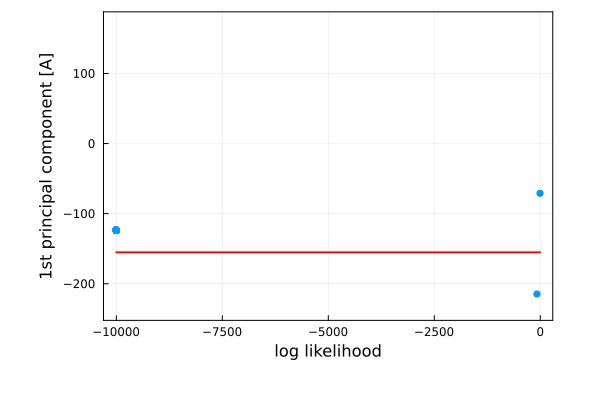

In [276]:
plot(ps[1])